## Importing Libaries

In [53]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab, deltaE_cie76
from PIL import Image
from collections import Counter
import os 

## Image Load

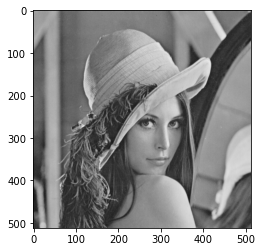

In [54]:
image = cv2.imread('lena512.bmp')
plt.imshow(image) 

##  color version of the image

In [55]:
print('Value of only R channel {}'.format(image[ 150, 100, 0]))
print('Value of only G channel {}'.format(image[ 150, 100, 1]))
print('Value of only B channel {}'.format(image[ 150, 100, 2])) 


Value of only R channel 104
Value of only G channel 104
Value of only B channel 104


## Conversion into Grayscale image

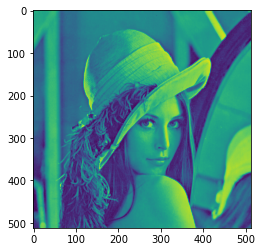

In [56]:
image = Image.open('lena512.bmp')
imgGray = image.convert('L')
plt.imshow(imgGray)
imgGray=imgGray.save("gray.jpg")

## Resize image using NEAREST function

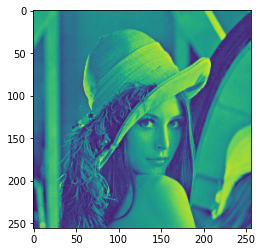

In [57]:
img = Image.open('gray.jpg')
NEAREST_img_scale_down = img.resize((img.width // 2, img.height // 2),Image.NEAREST)
plt.imshow(NEAREST_img_scale_down)

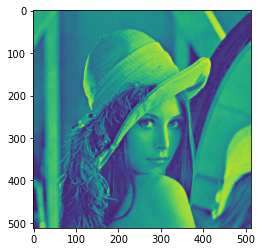

In [58]:
NEAREST_img_scale_up=NEAREST_img_scale_down.resize((NEAREST_img_scale_down.width * 2, NEAREST_img_scale_down.height * 2),Image.NEAREST)
plt.imshow(NEAREST_img_scale_up)

## Resize image using BILINEAR function

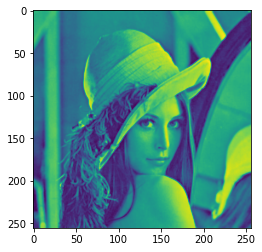

In [59]:
img = Image.open('gray.jpg')
BILINEAR_img_scale_down = img.resize((img.width // 2, img.height // 2),Image.BILINEAR)
plt.imshow(BILINEAR_img_scale_down)

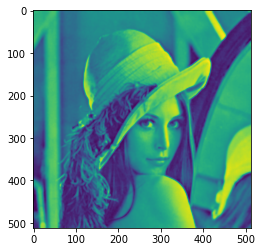

In [60]:
BILINEAR_img_scale_up=BILINEAR_img_scale_down.resize((BILINEAR_img_scale_down.width * 2, BILINEAR_img_scale_down.height * 2),Image.BILINEAR)
plt.imshow(BILINEAR_img_scale_up)

## Resize image using BICUBIC function

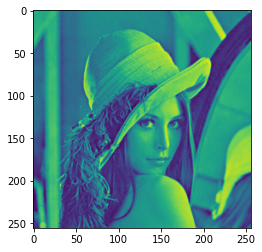

In [61]:
img = Image.open('gray.jpg')
BICUBIC_img_scale_down = img.resize((img.width // 2, img.height // 2),Image.BICUBIC)
plt.imshow(BICUBIC_img_scale_down)

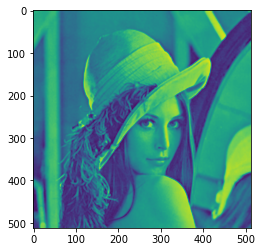

In [62]:
BICUBIC_img_scale_up=BICUBIC_img_scale_down.resize((BICUBIC_img_scale_down.width * 2, BICUBIC_img_scale_down.height * 2),Image.BICUBIC)
plt.imshow(BICUBIC_img_scale_up)

## PSNR values

In [63]:
def PSNR(img1,img2):
    R2=np.amax(img1)**2
    MSE=np.sum(np.power(np.subtract(img1,img2),2))
    MSE/=(img1.size[0]*img1.size[1])
    PSNR=10*np.log10(R2/MSE)
    return PSNR

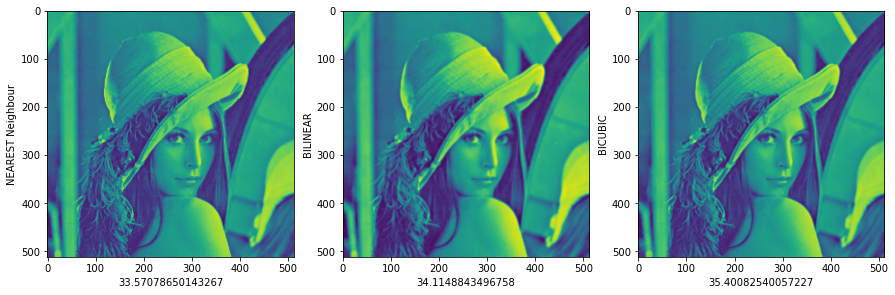

In [69]:
value_NEAREST = PSNR(image, NEAREST_img_scale_up)
value_BILINEAR = PSNR(image, BILINEAR_img_scale_up)
value_BICUBIC = PSNR(image, BICUBIC_img_scale_up)

fig = plt.figure(figsize=(15, 20))

fig.add_subplot(1, 3, 1)  
plt.ylabel("NEAREST Neighbour")
plt.xlabel(value_NEAREST)
plt.imshow(NEAREST_img_scale_up)

fig.add_subplot(1, 3, 2)
plt.ylabel("BILINEAR")
plt.xlabel(value_BILINEAR)
plt.imshow(BILINEAR_img_scale_up)

fig.add_subplot(1, 3, 3)
plt.ylabel("BICUBIC")
plt.xlabel(value_BICUBIC)
plt.imshow(BICUBIC_img_scale_up)

## Make function ChSwap and Swap RGB channels

In [70]:
def ChSwap(image): 
    b, g, r = cv2.split(image)
    new_r=b
    new_g=r
    new_b=g
    image_merge=cv2.merge([new_r,new_g,new_b])
    return image_merge

Text(0.5, 1.0, 'New Image')

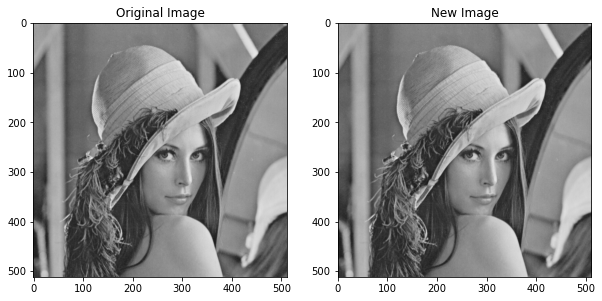

In [71]:
image = cv2.imread('lena512.bmp')
image_merge=ChSwap(image)
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)  
plt.imshow(image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(image_merge)
plt.title("New Image")

## Make function RedEyeRemoval to remove red spot in eye

In [72]:
def RedEyeRemoval(image):
    image_data = image.load()
    height,width = image.size
    for loop1 in range(height):
        for loop2 in range(width):
            r,g,b = image_data[loop1,loop2]
            image_data[loop1,loop2] = 0,g,b

    plt.imshow(image)        

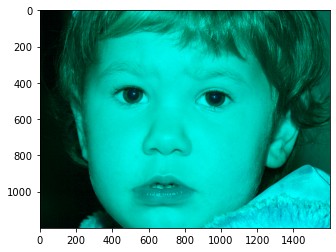

In [73]:
image = Image.open('kidred.jpg')
RedEyeRemoval(image)

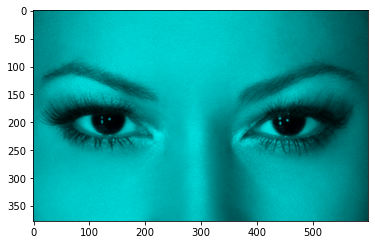

In [74]:
image=Image.open('redeye.jpg')
RedEyeRemoval(image)

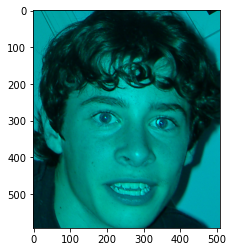

In [75]:
image=Image.open('Red-eye_effect.png')
RedEyeRemoval(image)

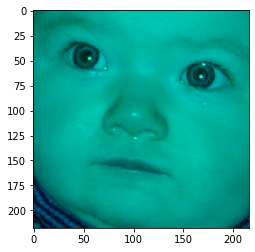

In [76]:
image=Image.open('redeyebaby.jpg')
RedEyeRemoval(image)